In [2]:
#pip install tensorflow

In [32]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data_set=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/house_price_dataset.csv')

In [6]:
data_set.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Saleprice
0,1,18.144573,13.833054,7,3.991517,2003,2003,19.433175,144.117862,0.0,...,0,0,1,0,0,0,0,1,0,208501.0
1,2,20.673625,14.117918,6,6.000033,1976,1976,54.598150,181.719186,0.0,...,0,0,1,0,0,0,0,1,0,181501.0
2,3,18.668047,14.476512,7,3.991517,2001,2002,17.768840,110.441033,0.0,...,0,0,1,0,0,0,0,1,0,223501.0
3,4,17.249651,14.106196,7,3.991517,1915,1970,54.598150,61.795315,0.0,...,0,0,1,1,0,0,0,0,0,140001.0
4,5,21.314283,15.022008,8,3.991517,2000,2000,25.404164,136.624601,0.0,...,0,0,1,0,0,0,0,1,0,250001.0


In [7]:
#check the columns with non-null values
data_set.shape

(1458, 380)

In [27]:
# let's select 1st 20 columns along with sale price for our ANN model
df_home=data_set.iloc[:,0:21]
#remove columns with zero value
df_home.drop(columns=['Id','BsmtFinSF2','LowQualFinSF'],inplace=True)
#add saleprice column to df_home
df_home['Saleprice']=data_set['Saleprice']

df_home.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Saleprice
0,18.144573,13.833054,7,3.991517,2003,2003,19.433175,144.117862,29.991055,422.488510,5.939034,1025.651979,8.353543,0.99344,0.000000,2,1.068837,3,208501.0
1,20.673625,14.117918,6,6.000033,1976,1976,54.598150,181.719186,44.135415,593.888179,6.234990,665.141633,7.974693,0.00000,0.710895,2,0.000000,3,181501.0
2,18.668047,14.476512,7,3.991517,2001,2002,17.768840,110.441033,56.896536,450.079716,5.994336,1040.521060,8.408064,0.99344,0.000000,2,1.068837,3,223501.0
3,17.249651,14.106196,7,3.991517,1915,1970,54.598150,61.795315,64.808858,378.854568,6.027704,904.477422,8.358662,0.99344,0.000000,1,0.000000,3,140001.0
4,21.314283,15.022008,8,3.991517,2000,2000,25.404164,136.624601,61.166379,545.309927,6.161221,1273.024863,8.669321,0.99344,0.000000,2,1.068837,4,250001.0


In [9]:
sns.pairplot(df_home)

Output hidden; open in https://colab.research.google.com to view.

In [10]:
df_features=df_home.columns[:-1].to_list()

In [28]:
#split data into train and test
X = df_home[df_features].values
y = df_home['Saleprice'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1166, 18)
(292, 18)
(1166,)
(292,)


In [12]:
y_train

array([145001., 178001., 148501., ..., 138501., 131501., 259001.])

In [29]:
#transform data into one uniform scale
scalar= MinMaxScaler()
scalar.fit(X_train)
X_train=scalar.transform(X_train)

# we will use this scale to transform other data also
X_test=scalar.transform(X_test)

In [14]:
X_test

array([[0.41114737, 0.34964482, 0.66666667, ..., 0.66666667, 0.47775704,
        0.375     ],
       [0.        , 0.04015695, 0.55555556, ..., 0.33333333, 0.47775704,
        0.25      ],
       [0.19939181, 0.32595575, 0.44444444, ..., 0.33333333, 0.        ,
        0.25      ],
       ...,
       [0.17497128, 0.16668349, 0.66666667, ..., 0.66666667, 0.        ,
        0.125     ],
       [0.21829445, 0.32848178, 0.33333333, ..., 0.33333333, 0.        ,
        0.5       ],
       [0.26342545, 0.30795317, 0.33333333, ..., 0.33333333, 0.        ,
        0.375     ]])

In [31]:
#now we will create ANN model
model=Sequential()
model.add(Dense(9, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
model.fit(X_train,y_train,epochs=1000)

Epoch 1/1000
37/37 [==============================] - 2s 3ms/step - loss: 39210561536.0000
Epoch 2/1000
37/37 [==============================] - 0s 3ms/step - loss: 39209734144.0000
Epoch 3/1000
37/37 [==============================] - 0s 3ms/step - loss: 39206957056.0000
Epoch 4/1000
37/37 [==============================] - 0s 3ms/step - loss: 39198814208.0000
Epoch 5/1000
37/37 [==============================] - 0s 3ms/step - loss: 39177703424.0000
Epoch 6/1000
37/37 [==============================] - 0s 3ms/step - loss: 39130284032.0000
Epoch 7/1000
37/37 [==============================] - 0s 3ms/step - loss: 39035281408.0000
Epoch 8/1000
37/37 [==============================] - 0s 3ms/step - loss: 38863233024.0000
Epoch 9/1000
37/37 [==============================] - 0s 3ms/step - loss: 38573543424.0000
Epoch 10/1000
37/37 [==============================] - 0s 3ms/step - loss: 38114738176.0000
Epoch 11/1000
37/37 [==============================] - 0s 3ms/step - loss: 37431799808.00

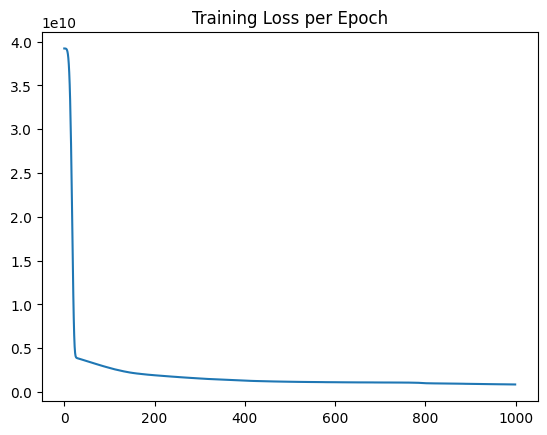

In [33]:
#model.history.history
loss = model.history.history['loss']
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

In [34]:
#let's predict...
test_predictions = model.predict(X_test)

10/10 [==============================] - 0s 3ms/step


In [35]:
#let's plot our prediction verses actual
df_pred=pd.DataFrame({'test_actual': y_test})
df_pred['test_pred']=test_predictions
df_pred.head()

,test_actual,test_pred
0,190001.0,223098.531250
1,100001.0,83027.343750
2,115001.0,115629.765625
3,159001.0,153720.421875
4,315501.0,317865.937500


<Axes: >

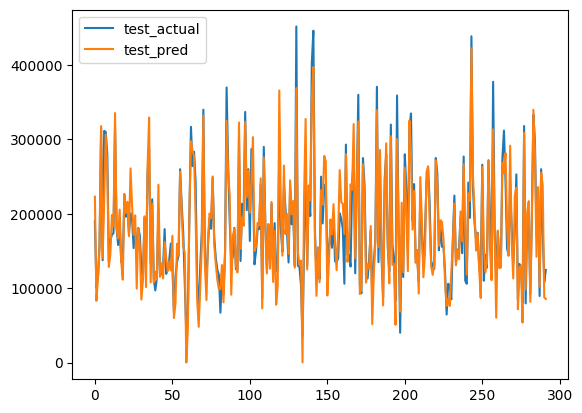

In [36]:
df_pred.plot(legend=True)

In [40]:
#calculating model accuracy
(df_pred['test_actual'].sum()-df_pred['test_pred'].sum())/df_pred['test_actual'].sum()

0.0034570884701803895